In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table

import pandas
pandas.set_option('display.max_columns', None)

#import sys
#!{sys.executable} -m pip install scienceplots 

import scienceplots
plt.style.use(['science', 'notebook', 'grid']) 
plt.rcParams['figure.figsize'] = [8 , 8]

# Lecture 5

## Generate parameters in log-scale

In [2]:
def precision_round(number, digits=2):
    power = "{:e}".format(number).split('e')[1]
    return round(number, -(int(power) - digits))

### Tau

In [3]:
params = np.logspace(start=np.log10(5), stop=np.log10(30000), num=40)

for i in range(len(params)):
    params[i] = precision_round(params[i])
    
print(''.join(str(num)+', ' for num in params))

5.0, 6.25, 7.81, 9.76, 12.2, 15.3, 19.1, 23.8, 29.8, 37.2, 46.5, 58.2, 72.7, 90.9, 114.0, 142.0, 177.0, 222.0, 277.0, 346.0, 433.0, 541.0, 676.0, 845.0, 1060.0, 1320.0, 1650.0, 2060.0, 2580.0, 3220.0, 4030.0, 5040.0, 6290.0, 7870.0, 9830.0, 12300.0, 15400.0, 19200.0, 24000.0, 30000.0, 


### Age

In [4]:
params = np.logspace(start=np.log10(20), stop=3, num=10)
params = np.append(params, np.arange(1500, 13500, step=500))

for i in range(len(params)):
    params[i] = precision_round(params[i])
    
print(''.join(str(num)+', ' for num in params))

20.0, 30.9, 47.7, 73.7, 114.0, 176.0, 271.0, 419.0, 647.0, 1000.0, 1500.0, 2000.0, 2500.0, 3000.0, 3500.0, 4000.0, 4500.0, 5000.0, 5500.0, 6000.0, 6500.0, 7000.0, 7500.0, 8000.0, 8500.0, 9000.0, 9500.0, 10000.0, 10500.0, 11000.0, 11500.0, 12000.0, 12500.0, 13000.0, 


## Analyze the input data

In [5]:
data = Table.read('SDSS_LAB2024_photometry.fits', format='fits')
data = data.to_pandas()
data

,id,ra,dec,redshift,sdss.up,sdss.up_err,sdss.gp,sdss.gp_err,sdss.rp,sdss.rp_err,sdss.ip,sdss.ip_err,sdss.zp,sdss.zp_err
0,1237657873254907919,140.153626,39.308208,0.028312,0.119670,0.020435,1.029917,0.012816,1.621148,0.022931,1.954847,0.023217,2.286192,0.059580
1,1237657873254973544,140.325684,39.456471,0.056195,0.091612,0.006626,0.247744,0.003121,0.358206,0.004741,0.453588,0.007278,0.492240,0.025029
2,1237654880726286453,190.287293,5.309674,0.074970,0.045000,0.004752,0.214703,0.004054,0.462379,0.007594,0.667785,0.011125,0.835854,0.022765
3,1237654880727728243,193.587524,5.282654,0.048760,0.466016,0.013479,1.720028,0.006990,2.967451,0.009481,4.098367,0.018062,4.911618,0.059197
4,1237654880728842356,196.179871,5.124015,0.054671,0.147323,0.008597,0.379945,0.003792,0.529207,0.006502,0.663836,0.009359,0.737546,0.032889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92478,1237654881812545849,219.128952,5.382636,0.029722,0.130263,0.007935,0.621287,0.008810,1.230597,0.015837,1.698397,0.020601,2.189831,0.033350
92479,1237654881814511891,223.538071,5.049211,0.028227,0.050782,0.006481,0.183128,0.002653,0.343451,0.003437,0.469283,0.005994,0.610483,0.021694
92480,1237651823782396044,214.389114,5.217847,0.079587,0.126914,0.013361,0.634937,0.021585,1.301933,0.033164,1.929476,0.038042,2.559679,0.063614
92481,1237651823782985830,215.724396,5.183447,0.056425,0.101443,0.014067,0.449638,0.008164,0.778556,0.010234,0.989564,0.016335,1.230477,0.053690


In [6]:
def Plot(row_index):
    row = data.T[row_index]
    x = np.array([3540, 4750, 6220, 7630, 9050])
    y = np.array([row['sdss.up'], row['sdss.gp'], row['sdss.rp'], row['sdss.ip'], row['sdss.zp']])
    y_err = np.array([row['sdss.up_err'], row['sdss.gp_err'], row['sdss.rp_err'], row['sdss.ip_err'], row['sdss.zp_err']])
    plt.errorbar(x, y, yerr=y_err, ls='--',  fmt='o', color='deepskyblue', ecolor='grey', capsize=4, capthick=2)
    plt.ylim(0)
    plt.xlabel('$\lambda [A]$')
    plt.ylabel('$f_\\nu$')

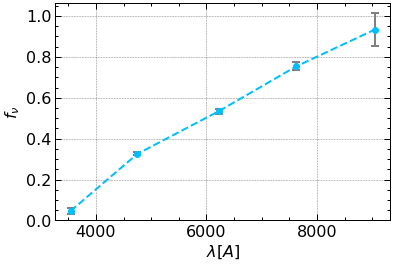

In [7]:
Plot(2000)

## Analyze the output data

In [8]:
results = Table.read('./out_full/results.fits', format='fits')
results = results.to_pandas()
results

,id,bayes.sfh.sfr,bayes.sfh.sfr_err,bayes.sfh.sfr100Myrs,bayes.sfh.sfr100Myrs_err,bayes.sfh.sfr10Myrs,bayes.sfh.sfr10Myrs_err,bayes.sdss.gp,bayes.sdss.gp_err,bayes.sdss.ip,bayes.sdss.ip_err,bayes.sdss.rp,bayes.sdss.rp_err,bayes.sdss.up,bayes.sdss.up_err,bayes.sdss.zp,bayes.sdss.zp_err,best.chi_square,best.reduced_chi_square,best.attenuation.B_B90,best.attenuation.E_BVs.nebular.continuum_old,best.attenuation.E_BVs.nebular.continuum_young,best.attenuation.E_BVs.nebular.lines_old,best.attenuation.E_BVs.nebular.lines_young,best.attenuation.E_BVs.stellar.old,best.attenuation.E_BVs.stellar.young,best.attenuation.FUV,best.attenuation.V_B90,best.attenuation.ebvs_old_factor,best.attenuation.powerlaw_slope,best.attenuation.uv_bump_amplitude,best.attenuation.uv_bump_wavelength,best.attenuation.uv_bump_width,best.nebular.f_dust,best.nebular.f_esc,best.nebular.lines_width,best.nebular.logU,best.nebular.ne,best.nebular.zgas,best.sfh.age,best.sfh.burst_age,best.sfh.f_burst,best.sfh.tau_burst,best.sfh.tau_main,best.stellar.age_m_star,best.stellar.imf,best.stellar.metallicity,best.stellar.old_young_separation_age,best.universe.age,best.universe.luminosity_distance,best.universe.redshift,best.attenuation.nebular.continuum_old,best.attenuation.nebular.continuum_young,best.attenuation.nebular.lines_old,best.attenuation.nebular.lines_young,best.attenuation.stellar.old,best.attenuation.stellar.young,best.dust.luminosity,best.sfh.integrated,best.sfh.sfr,best.sfh.sfr100Myrs,best.sfh.sfr10Myrs,best.stellar.lum,best.stellar.lum_ly,best.stellar.lum_ly_old,best.stellar.lum_ly_young,best.stellar.lum_old,best.stellar.lum_young,best.stellar.m_gas,best.stellar.m_gas_old,best.stellar.m_gas_young,best.stellar.m_star,best.stellar.m_star_old,best.stellar.m_star_young,best.stellar.n_ly,best.stellar.n_ly_old,best.stellar.n_ly_young,best.sdss.up,best.sdss.gp,best.sdss.rp,best.sdss.ip,best.sdss.zp
0,1237657873254907919,0.024257,0.148864,0.034852,0.180222,0.024923,0.150864,0.813277,0.064224,1.966500,0.049148,1.459651,0.023274,0.161777,0.016154,2.532923,0.126091,7.830311,1.957578,1.331683,0.264,0.60,0.264,0.60,0.264,0.60,2.621240,1.072804,0.44,0.0,0.0,217.5,35.0,0.0,0.0,300.0,-2.0,100.0,0.02,647.0,20.0,0.0,0.1,46.5,600.703624,1.0,0.02,10.0,13368.111980,3.803276e+24,0.028312,5.055656e+32,1.299495e+31,1.112661e+33,2.733061e+31,2.468935e+36,2.327126e+32,2.470826e+36,5.658388e+09,1.114690e-04,3.891712e-04,1.230300e-04,5.279591e+36,3.974634e+33,3.919185e+33,5.544877e+31,5.279295e+36,2.953351e+32,2.062985e+09,2.062985e+09,7.630566e+01,3.595402e+09,3.595401e+09,1.153994e+03,7.954457e+50,7.786732e+50,1.677245e+49,0.163447,0.855873,1.471915,1.969252,2.509335
1,1237657873254973544,1.703986,1.943519,2.361601,3.351815,1.720523,1.963627,0.242112,0.012637,0.443666,0.014797,0.344725,0.011248,0.093262,0.009139,0.522656,0.030554,0.118907,0.029727,0.249372,0.044,0.10,0.044,0.10,0.044,0.10,0.737715,0.193441,0.44,0.0,0.0,217.5,35.0,0.0,0.0,300.0,-2.0,100.0,0.02,1500.0,20.0,0.0,0.1,541.0,1042.152363,1.0,0.02,10.0,13003.015620,7.708407e+24,0.056195,1.829330e+32,2.316632e+34,4.615793e+32,5.564139e+34,4.149507e+35,4.743766e+35,9.687794e+35,3.278326e+09,4.043335e-01,4.437052e-01,4.077165e-01,3.973401e+36,1.988034e+35,3.698753e+33,1.951046e+35,2.966458e+36,1.006943e+36,1.277028e+09,1.276785e+09,2.426724e+05,2.001298e+09,1.997463e+09,3.834491e+06,5.996591e+52,8.757685e+50,5.909014e+52,0.091143,0.253507,0.362687,0.441209,0.500566
2,1237654880726286453,0.912346,1.924841,0.939005,1.961911,0.914507,1.927816,0.207874,0.011325,0.654413,0.019171,0.456883,0.019417,0.044528,0.005430,0.878735,0.046464,0.082754,0.020689,0.770858,0.154,0.35,0.154,0.35,0.154,0.35,1.555298,0.623578,0.44,0.0,0.0,217.5,35.0,0.0,0.0,300.0,-2.0,100.0,0.02,1500.0,20.0,0.0,0.1,46.5,1453.856923,1.0,0.02,10.0,12764.994344,1.042477e+25,0.074970,1.652499e+33,4.475367e+23,3.824081e+33,9.634630e+23,2.570888e+36,8.364153e+24,2.576364e+36,1.980224e+10,4.211531e-12,1.470370e-11,4.648328e-12,9.388564e+36,1.550025e+34,1.550025e+34,2.094970e+

Text(0.5, 0, 'SFR $[M_\\odot/yr]$')

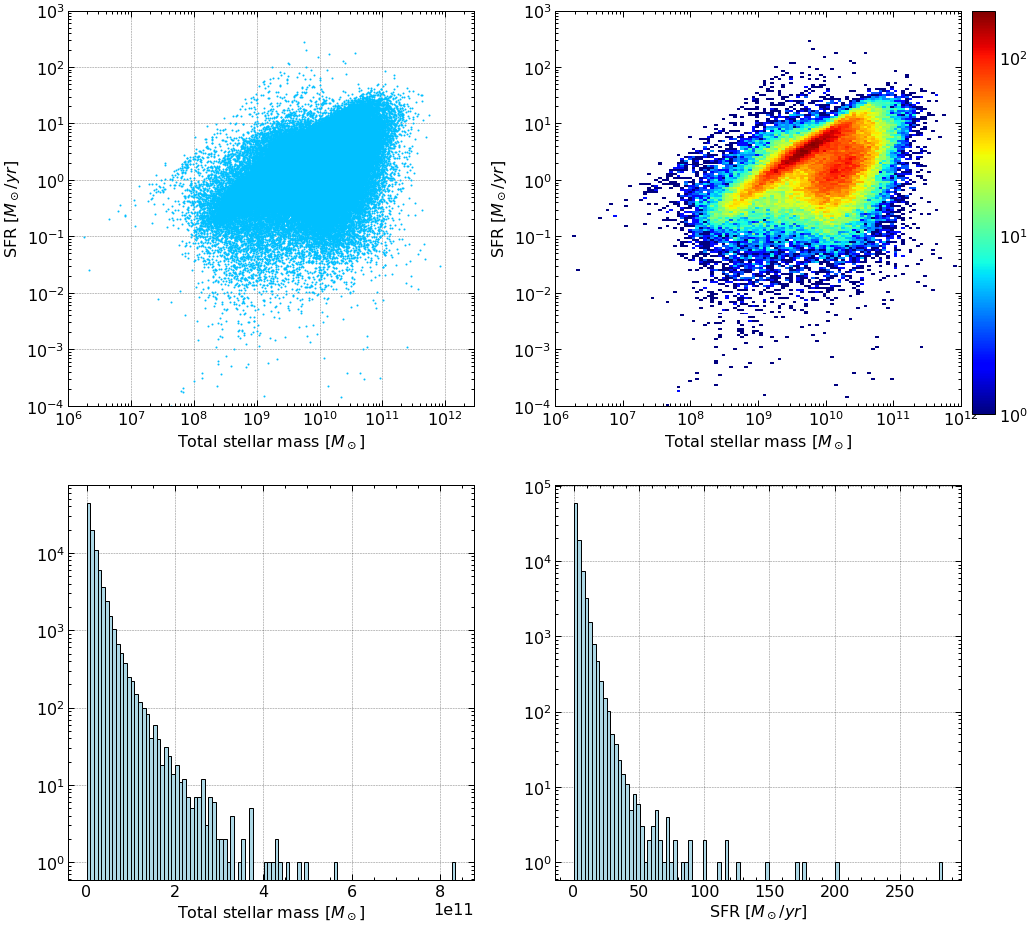

In [9]:
x_data = results['best.stellar.m_star']
y_data = results['bayes.sfh.sfr10Myrs']

plt.rcParams['figure.figsize'] = [16 , 16]
fig, axes = plt.subplots(2, 2)

ax = axes[0, 0]
ax.scatter(x_data, y_data, s=1, color='deepskyblue')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(1e6)
ax.set_ylim(1e-4, 1e3)
ax.set_xlabel('Total stellar mass $[M_\odot]$')
ax.set_ylabel('SFR $[M_\odot/yr]$')

ax = axes[0, 1]
binx = np.logspace(start=1, stop=12, num=200)
biny = np.logspace(start=-4, stop=3, num=200)
hist = ax.hist2d(x_data, y_data, bins=(binx, biny), norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(1e6)
ax.set_ylim(1e-4, 1e3)
ax.set_xlabel('Total stellar mass $[M_\odot]$')
ax.set_ylabel('SFR $[M_\odot/yr]$')
cax = fig.add_axes([0.91, 0.53, 0.02, 0.35])
fig.colorbar(hist[3], cax=cax)

ax = axes[1, 0]
ax.hist(x_data, bins=100, color='lightblue', edgecolor='black')
ax.set_yscale('log')
ax.set_xlabel('Total stellar mass $[M_\odot]$')

ax = axes[1, 1]
ax.hist(y_data, bins=100, color='lightblue', edgecolor='black')
ax.set_yscale('log')
ax.set_xlabel('SFR $[M_\odot/yr]$')

## Prof Results

In [10]:
prof_results = Table.read('SDSS_LAB2024_PROFresults.fits', format='fits')
prof_results = prof_results.to_pandas()
prof_results

,id,bayes_attenuation_E_BVs_stellar_young,bayes_attenuation_E_BVs_stellar_young_err,bayes_sfh_age,bayes_sfh_age_err,bayes_sfh_tau_main,bayes_sfh_tau_main_err,bayes_sfh_sfr,bayes_sfh_sfr_err,bayes_stellar_m_star,bayes_stellar_m_star_err,best_chi_square,best_reduced_chi_square,best_attenuation_E_BVs_stellar_old,best_sfh_age,best_sfh_tau_main,best_stellar_imf,best_stellar_metallicity,best_universe_age,best_universe_redshift,best_sfh_sfr,best_stellar_m_star,best_sdss_up,best_sdss_gp,best_sdss_rp,best_sdss_ip,best_sdss_zp
0,1237657873254907919,0.439979,0.297138,2307.783581,2733.938411,251.981000,597.761532,0.074127,0.283214,5.114772e+09,2.604504e+09,9.039739,2.259935,0.308,500.0,25.0,1.0,0.02,13079.492433,0.028312,4.709603e-07,3.618749e+09,0.168579,0.857684,1.443019,1.944967,2.521401
1,1237657873254973544,0.340654,0.190145,2274.675179,2698.080855,4785.521056,5699.993866,1.791386,1.452879,2.242854e+09,1.101281e+09,0.133346,0.033337,0.044,1500.0,550.0,1.0,0.02,12712.959976,0.056195,4.159309e-01,1.995007e+09,0.093266,0.250401,0.357483,0.441967,0.507016
2,1237654880726286453,0.309067,0.323570,5084.719281,3175.732109,1459.799908,2816.415591,1.324841,3.680894,1.966669e+10,7.242707e+09,0.131009,0.032752,0.154,1500.0,150.0,1.0,0.02,12474.238209,0.074970,5.400645e-03,1.050789e+10,0.044796,0.210816,0.453888,0.646064,0.850719
3,1237654880727728243,0.463518,0.290844,3527.452299,3265.858845,3755.624268,5065.228056,10.111741,12.214494,2.871506e+10,1.272551e+10,0.139994,0.034999,0.110,1500.0,350.0,1.0,0.02,12809.281341,0.048760,1.264196e+00,1.906038e+10,0.472053,1.742711,3.014648,3.971649,4.913459
4,1237654880728842356,0.329104,0.186552,2242.521225,2711.316533,5080.736624,5812.253729,2.620184,2.059714,2.953484e+09,1.487250e+09,0.060264,0.015066,0.044,1500.0,600.0,1.0,0.02,12732.628748,0.054671,6.549524e-01,2.689200e+09,0.145658,0.378980,0.528983,0.650577,0.742736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92478,1237654881812545849,0.309599,0.318723,5046.307630,3268.241666,1446.303364,2794.474426,0.456119,1.229910,7.268362e+09,2.706641e+09,0.034705,0.008676,0.176,1250.0,150.0,1.0,0.02,13060.600447,0.029722,9.039396e-03,3.398613e+09,0.131267,0.617498,1.216714,1.702972,2.215742
92479,1237654881814511891,0.479323,0.319761,4512.148272,3650.367501,4219.290832,5201.618333,0.401615,0.567161,1.361923e+09,5.867743e+08,0.009149,0.002287,0.132,3000.0,850.0,1.0,0.02,13080.632292,0.028227,7.480005e-02,1.200925e+09,0.050802,0.183625,0.343011,0.472307,0.615717
92480,1237651823782396044,0.392913,0.369922,4675.033045,3167.763296,1655.496427,3188.204541,6.963005,16.883604,6.486067e+10,2.462301e+10,0.065878,0.016470,0.308,1000.0,200.0,1.0,0.02,12416.498657,0.079587,2.105507e+00,3.857385e+10,0.123944,0.640418,1.315521,1.905964,2.583330
92481,1237651823782985830,0.430933,0.281861,2460.107252,2714.430699,2050.880248,3985.827737,2.236048,3.493124,8.683587e+09,3.932966e+09,0.023726,0.005931,0.132,1000.0,150.0,1.0,0.02,12710.000718,0.056425,8.655415e-02,6.288929e+09,0.104276,0.453841,0.778435,1.002340,1.224328


Text(0.5, 0, 'SFR $[M_\\odot/yr]$')

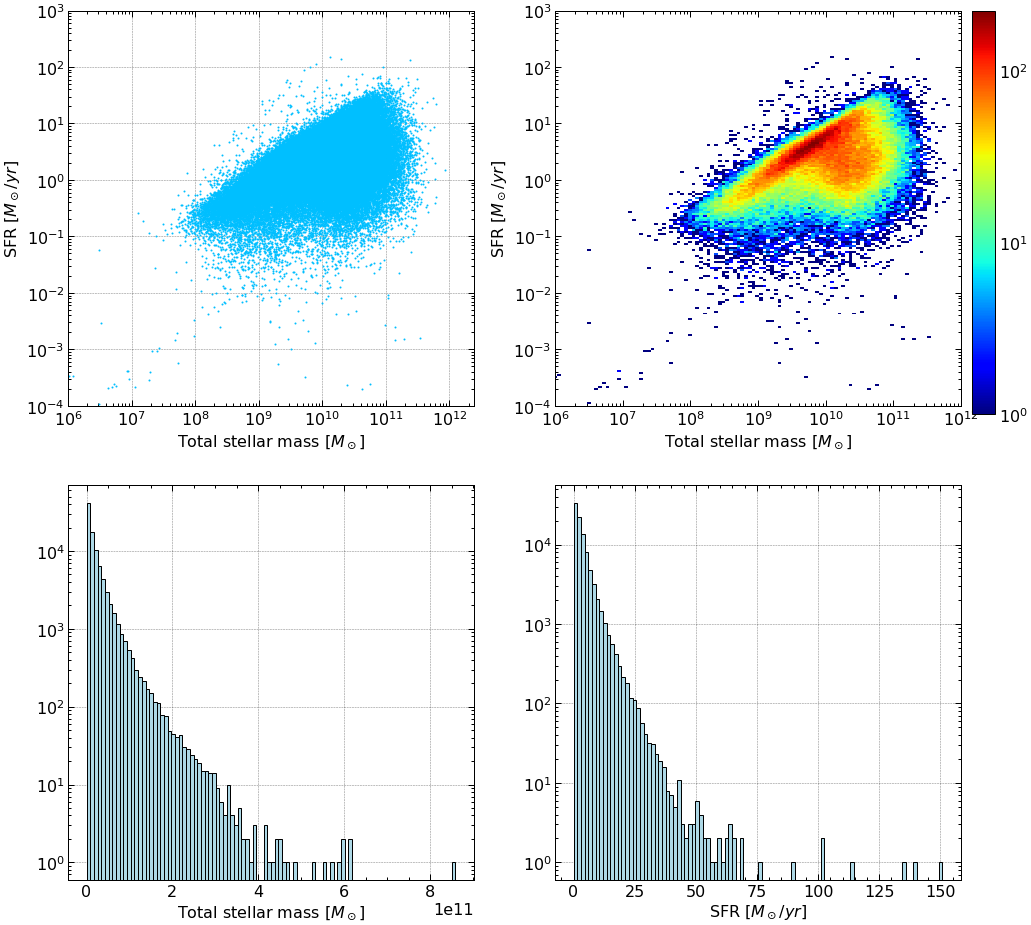

In [11]:
x_data = prof_results['bayes_stellar_m_star']
y_data = prof_results['bayes_sfh_sfr']

plt.rcParams['figure.figsize'] = [16 , 16]
fig, axes = plt.subplots(2, 2)

ax = axes[0, 0]
ax.scatter(x_data, y_data, s=1, color='deepskyblue')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(1e6)
ax.set_ylim(1e-4, 1e3)
ax.set_xlabel('Total stellar mass $[M_\odot]$')
ax.set_ylabel('SFR $[M_\odot/yr]$')

ax = axes[0, 1]
binx = np.logspace(start=1, stop=12, num=200)
biny = np.logspace(start=-4, stop=3, num=200)
hist = ax.hist2d(x_data, y_data, bins=(binx, biny), norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(1e6)
ax.set_ylim(1e-4, 1e3)
ax.set_xlabel('Total stellar mass $[M_\odot]$')
ax.set_ylabel('SFR $[M_\odot/yr]$')
cax = fig.add_axes([0.91, 0.53, 0.02, 0.35])
fig.colorbar(hist[3], cax=cax)

ax = axes[1, 0]
ax.hist(x_data, bins=100, color='lightblue', edgecolor='black')
ax.set_yscale('log')
ax.set_xlabel('Total stellar mass $[M_\odot]$')

ax = axes[1, 1]
ax.hist(y_data, bins=100, color='lightblue', edgecolor='black')
ax.set_yscale('log')
ax.set_xlabel('SFR $[M_\odot/yr]$')

# fraction of galaxies on MS with respect to the others , SF MAIN SEQUENCE !!!

## we have to define a line dividing MS and and the nabula (??) ---> ad occhioooo

In [ ]:
#separation = 

# Lecture 6

In [12]:
from astropy.coordinates import FK5, SkyCoord
import astropy.constants as astroconst
from astropy.cosmology import Planck18 as cosmo
from astropy import units as u
from tqdm import tqdm

In [44]:
c = astroconst.c #m/s
c_kpc_s = c *u.kpc / (astroconst.kpc)
print(c_kpc_s)

c_km_s = c *u.km/(1000 *u.m)
print(c_km_s)


9.715611890180196e-12 kpc / s
299792.458 km / s


In [124]:
NEIcoords = SkyCoord(ra=data['ra']*u.deg, dec=data['dec']*u.deg)
NEIredshift = data['redshift']
print(NEIredshift)

n_galaxies_cyl =[]
radius = 500*u.kpc
depth = (2500*  u.km / u.s)
central_gal_coords = []

for gal in tqdm(range(0, len(data['id']), int(len(data['id'])/1000))):
    PRIcoords = SkyCoord(ra=data['ra'][gal]*u.deg, dec=data['dec'][gal]*u.deg)
    central_gal_coords.append(PRIcoords)
    PRIredshift = data['redshift'][gal]
    
    # Obtain a separation of all galaxies from the primary and convert to arcsec
    Separation = NEIcoords.separation(PRIcoords).to(u.arcsec)
    #convert to kpc 
    ang_1kpc = cosmo.arcsec_per_kpc_proper(PRIredshift)
    Separation_kpc = Separation/ang_1kpc
    
    #now we want also the separation in velocity:  (in kpc/s)
    #Sep_vel = (NEIredshift - PRIredshift)* c_kpc_s / (1 + PRIredshift)
    Sep_vel = (NEIredshift - PRIredshift)* c_km_s / (1 + PRIredshift)
    
    #define the cylinder
    mask_base = Separation_kpc < radius
    #mask_depth = Sep_vel < (0.1* 10**(-13)* u.kpc / u.s)
    mask_depth = ((Sep_vel < depth) & (Sep_vel > - depth))
    
    mask_cylinder = mask_base & mask_depth
    n_galaxies_cyl.append(mask_cylinder.sum())
    
surface_density = n_galaxies_cyl / (np.pi * radius**2)

0        0.028312
1        0.056195
2        0.074970
3        0.048760
4        0.054671
           ...   
92478    0.029722
92479    0.028227
92480    0.079587
92481    0.056425
92482    0.056476
Name: redshift, Length: 92483, dtype: float64


100%|██████████| 1006/1006 [00:13<00:00, 72.96it/s]


# Is there a difference in the SFR based on density??

In [120]:
central_gal_coords[0]

<SkyCoord (ICRS): (ra, dec) in deg
    (140.1536255, 39.3082085)>

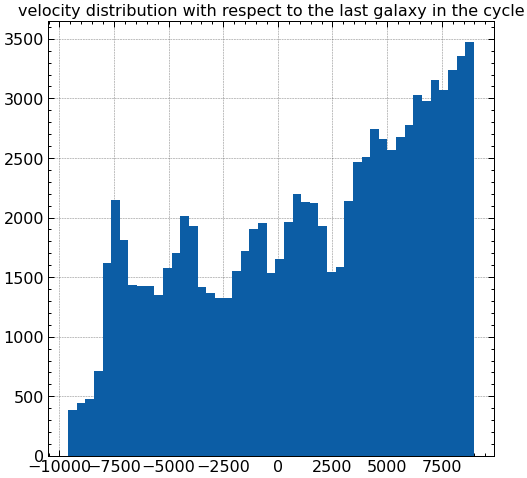

In [121]:
plt.rcParams['figure.figsize'] = [8 , 8]
plt.hist(Sep_vel, bins= 'auto')
plt.title("velocity distribution with respect to the last galaxy in the cycle")
plt.show()

## diagnostics to check the masks

In [125]:
#print(Separation_kpc)
#print(ang_1kpc)

print(mask_base)
print(mask_base.sum())

print(mask_depth)
print(mask_depth.sum())


print(mask_cylinder)
print(mask_cylinder.sum())


#print(Sep_vel)


[False False False ... False False False]
3
0        False
1         True
2        False
3         True
4         True
         ...  
92478    False
92479    False
92480    False
92481     True
92482     True
Name: redshift, Length: 92483, dtype: bool
23032
0        False
1        False
2        False
3        False
4        False
         ...  
92478    False
92479    False
92480    False
92481    False
92482    False
Name: redshift, Length: 92483, dtype: bool
2


# we tried to do the plot but we failed ---> astropy projections
## we could do also a plot of dec and ra with different colors depending on density

In [101]:
print(surface_density)
#surface_density_abs = surface_density * u.kpc**2
surface_density_abs = np.asarray(surface_density_abs)
surface_density_abs = np.array([surface_density_abs[i] for i in range(len(surface_density_abs))])
print(type(surface_density_abs[0]))

central_gal_coords_abs = np.zeros((len(central_gal_coords), 2))

for i in range(len(central_gal_coords_abs)):
    for j in range(2):
        central_gal_coords_abs[i][j] = central_gal_coords[i][j]

print(central_gal_coords_abs)

[7.63943727e-06 1.27323954e-06 2.54647909e-06 ... 1.27323954e-06
 2.54647909e-06 2.54647909e-06] 1 / kpc2
<class 'numpy.float64'>


TypeError: 'Longitude' object with a scalar value does not support indexing

AttributeError: 'list' object has no attribute 'ra'

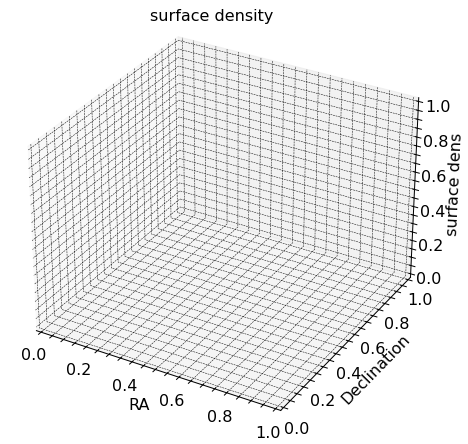

In [116]:
#print(n_galaxies_cyl, surface_density)


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(projection = '3d')
fig.suptitle("surface density ", fontsize='16', y=0.87)
ax.set_xlabel('RA')
ax.set_ylabel('Declination')
ax.set_zlabel('surface dens')
ax.scatter(central_gal_coords[:].ra, central_gal_coords[:].dec , surface_density_abs , color = 'deepskyblue')
plt.show()


In [ ]:
NEIcoords = SkyCoord(ra=data['ra']*u.deg, dec=data['dec']*u.deg)

for gal in tqdm(range(len(data['id']))):
    PRIcoords = SkyCoord(ra=data['ra'][gal]*u.deg, dec=data['dec'][gal]*u.deg)
    PRIredshift = data['redshift'][gal]
    
    # Obtain a separation of all galaxies from the primary and convert to arcsec
    Separation = NEIcoords.separation(PRIcoords).to(u.arcsec)
    
    #convert to kpc 
    ang_1kpc = csm.arcsec_per_kpc_proper(PRIredshift)
    Separation_kpc = Separation/ang_1kpc
    